In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\harip\\Desktop\\Datascience\\data\\height-weight.csv')
df.shape

(23, 2)

In [4]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


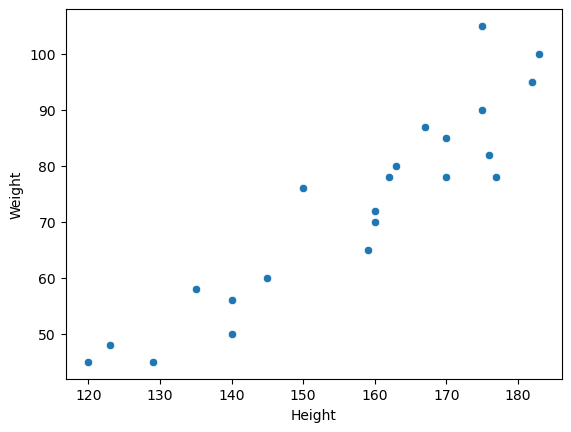

In [11]:
# Plotting a Basics Scatter Plot
sns.scatterplot(x= df.Height, y = df.Weight)
plt.show()


In [13]:
# Well see the co-linearity btw the data
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [14]:
# Train our model for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# we need to custom adj r2

In [16]:
# independent var
X = df[['Weight']]
y = df['Height']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.22,random_state=143)

In [20]:
X_train.head()

,Weight
15,78
2,48
1,58
17,65
14,85


In [21]:
y_train.head()

15    177
2     123
1     135
17    159
14    170
Name: Height, dtype: int64

In [18]:
lr =LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# here we have to test our model
lr.predict(X_test)

array([193.6311181 , 157.43331837, 171.91243826, 208.11023799,
       193.6311181 , 137.16255052, 142.95419847, 200.87067804,
       121.23551863, 169.01661428, 121.23551863, 169.01661428,
       128.47507858, 186.39155815, 182.04782218, 166.1207903 ,
       174.80826224, 160.32914234])

In [23]:
df = pd.DataFrame({
    'actual_values' : y_test,
    'predicted_value' : lr.predict(X_test)
})

In [24]:
df

,actual_values,predicted_value
11,182,193.631118
4,160,157.433318
6,163,171.912438
12,175,208.110238
8,182,193.631118
21,140,137.162551
3,145,142.954198
13,183,200.870678
0,120,121.235519
5,162,169.016614


In [27]:
# when you see above there is some error btw the actual and the predicted 
# so i use the r2 to check how this model is performing on my data
accuracy = r2_score(y_test,lr.predict(X_test))
accuracy
# This model is giving me 56% accuracy
# out of 100 datapoint , 56 of them were actually predicted right

0.5625606737837192

In [28]:
# lets try to implement the average error i am getting in this 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,lr.predict(X_test))
mae
# i am getting an average of 9 difference btw the original and predicted 

9.067305293618723

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,lr.predict(X_test))
mse

147.05117004166254

In [30]:
from math import *
print(sqrt(mse))

12.126465686326851


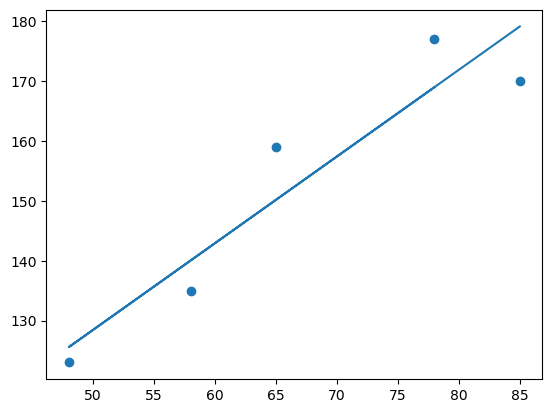

In [40]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))